In [696]:
# Librerías
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, PowerTransformer, QuantileTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score, auc
import shap
from pycaret.classification import setup, compare_models, predict_model, save_model, plot_model
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import time
import optuna
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import joblib
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, LeakyReLU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

import warnings
warnings.simplefilter('ignore')

RANDOM_SEED = 42

random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [697]:
# tiempo inicial
start_time = time.time()

In [698]:
# Carga del dataset
file_path= 'weatherAUS.csv'
df = pd.read_csv(file_path)

In [699]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [700]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [701]:
def calcular_porcentaje(faltante, total):
    '''
    Evita la división por cero al calcular el porcentaje.
    '''
    if total == 0:
        return 0
    
    porcentaje = (faltante / total) * 100
    return porcentaje 

def imprimir_porcentaje(porcentaje, columna):
    '''
    Imprime los resultados del porcentaje por cada columna.
    '''
    print(f"{columna}: {porcentaje:.2f}%")
    return

def calcular_datos_faltantes(X):
    '''
    Calcula el porcentaje de valores faltantes de cada columna
    '''
    for columna in X.columns:
        faltante = X[columna].isnull().sum()
        total = len(X)
        porcentaje = calcular_porcentaje(faltante, total)
        imprimir_porcentaje(porcentaje, columna)
    return 
calcular_datos_faltantes(df)

Date: 0.00%
Location: 0.00%
MinTemp: 1.02%
MaxTemp: 0.87%
Rainfall: 2.24%
Evaporation: 43.17%
Sunshine: 48.01%
WindGustDir: 7.10%
WindGustSpeed: 7.06%
WindDir9am: 7.26%
WindDir3pm: 2.91%
WindSpeed9am: 1.21%
WindSpeed3pm: 2.11%
Humidity9am: 1.82%
Humidity3pm: 3.10%
Pressure9am: 10.36%
Pressure3pm: 10.33%
Cloud9am: 38.42%
Cloud3pm: 40.81%
Temp9am: 1.21%
Temp3pm: 2.48%
RainToday: 2.24%
RainTomorrow: 2.25%


- probar cambios en el escalamiento de datos y en la codificación de variables categóricas
- ver de usar la fecha o la localidad o region para imputar datos

In [702]:

# Eliminamos columnas con más de 11% de datos faltantes 
columnas = ['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am']
df = df.drop(columns=columnas)

# Eliminamos filas con datos faltantes en la columna objetivo
df.dropna(subset=['RainTomorrow'], inplace=True)

### Obtengo columnas: Month y Region

In [703]:
# Transforma el tipo de dato de la variable "Date"
df['Date'] = pd.to_datetime(df['Date'])  
# Obtener el mes a partir de la fecha
df['Month'] = df['Date'].dt.month

In [704]:
mapping_dict = {'Albury': 'Sur',
 'BadgerysCreek': 'Este',
 'Cobar': 'Este',
 'CoffsHarbour': 'Este',
 'Moree': 'Este',
 'Newcastle': 'Este',
 'NorahHead': 'Este',
 'NorfolkIsland': 'Este',
 'Penrith': 'Este',
 'Richmond': 'Sur',
 'Sydney': 'Este',
 'SydneyAirport': 'Este',
 'WaggaWagga': 'Sur',
 'Williamtown': 'Este',
 'Wollongong': 'Este',
 'Canberra': 'Sur',
 'Tuggeranong': 'Sur',
 'MountGinini': 'Sur',
 'Ballarat': 'Sur',
 'Bendigo': 'Sur',
 'Sale': 'Sur',
 'MelbourneAirport': 'Sur',
 'Melbourne': 'Sur',
 'Mildura': 'Sur',
 'Nhil': 'Sur',
 'Portland': 'Sur',
 'Watsonia': 'Sur',
 'Dartmoor': 'Sur',
 'Brisbane': 'Este',
 'Cairns': 'Norte',
 'GoldCoast': 'Este',
 'Townsville': 'Norte',
 'Adelaide': 'Sur',
 'MountGambier': 'Sur',
 'Nuriootpa': 'Sur',
 'Woomera': 'Sur',
 'Albany': 'Oeste',
 'Witchcliffe': 'Oeste',
 'PearceRAAF': 'Norte',
 'PerthAirport': 'Oeste',
 'Perth': 'Oeste',
 'SalmonGums': 'Oeste',
 'Walpole': 'Oeste',
 'Hobart': 'Sur',
 'Launceston': 'Sur',
 'AliceSprings': 'Norte',
 'Darwin': 'Norte',
 'Katherine': 'Norte',
 'Uluru': 'Norte'}

def map_location_to_region(X, mapping):
    """Mapea la columna Location a Regiones usando un diccionario."""
    
    # X llega como DataFrame (n_samples, 1), lo convertimos a pd.Series
    X_col = X.iloc[:, 0]
    
    # .map() aplica el diccionario.
    # Si una 'Location' no está en el 'mapping', pondrá NaN.
    regions = X_col.map(mapping)
    
    # Devolver como (n_samples, 1) para sklearn
    return regions

In [705]:
df['Regiones']=map_location_to_region(df[['Location']], mapping_dict)

In [706]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Regiones
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,12,Sur
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,12,Sur
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,12,Sur
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,12,Sur
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,12,Sur


In [707]:
# Eliminación de columnas que ya no son de interés
columnas = ['Date', 'Location']
df = df.drop(columns=columnas)

### Divido en el dataset en train y test

In [708]:
# dividir df en train y test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['RainTomorrow'])

In [709]:
train_df.shape, test_df.shape

((113754, 19), (28439, 19))

In [710]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113754 entries, 103642 to 122308
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        113241 non-null  float64
 1   MaxTemp        113496 non-null  float64
 2   Rainfall       112623 non-null  float64
 3   WindGustDir    106269 non-null  object 
 4   WindGustSpeed  106314 non-null  float64
 5   WindDir9am     105699 non-null  object 
 6   WindDir3pm     110688 non-null  object 
 7   WindSpeed9am   112672 non-null  float64
 8   WindSpeed3pm   111624 non-null  float64
 9   Humidity9am    112336 non-null  float64
 10  Humidity3pm    110857 non-null  float64
 11  Pressure9am    102467 non-null  float64
 12  Pressure3pm    102492 non-null  float64
 13  Temp9am        113019 non-null  float64
 14  Temp3pm        111551 non-null  float64
 15  RainToday      112623 non-null  object 
 16  RainTomorrow   113754 non-null  object 
 17  Month          113754 non-nul

### Imputacion de valores faltantes

In [711]:
# funciones para imputar datos faltantes usando la mediana o la moda

def imput_median(columna):
    mediana= train_df[columna].median()
    print(f"Mediana de {columna}: {round(mediana,2)}")
    #total de filas de la columna
    total_train = train_df.shape[0]
    total_test = test_df.shape[0]
    print(f"Total de casos imputados con la mediana en train: { train_df[columna].isnull().sum()} {round(train_df[columna].isnull().sum()*100/total_train,2)}%")
    print(f"Total de casos imputados con la mediana en test: {test_df[columna].isnull().sum()} {round(test_df[columna].isnull().sum()*100/total_test,2)}%")
    return

def imput_mode(columna):
    moda = train_df[columna].mode()[0]
    print(f"Moda de {columna}: {moda}")
    #total de filas de la columna
    total_train = train_df.shape[0]
    total_test = test_df.shape[0]
    print(f"Total de casos imputados con la moda en train: { train_df[columna].isnull().sum()} {round(train_df[columna].isnull().sum()*100/total_train,2)}%")
    print(f"Total de casos imputados con la moda en test: {test_df[columna].isnull().sum()} {round(test_df[columna].isnull().sum()*100/total_test,2)}%")
    return

In [712]:
imputer_median = SimpleImputer(strategy='median')      #Imputa con la mediana
imputer_mode = SimpleImputer(strategy='most_frequent') #Imputa con la moda

In [713]:
# Columnas a imputar con la mediana
variables_numericas = [
    "MinTemp",
    "MaxTemp",
    "WindGustSpeed",
    "WindSpeed9am",
    "WindSpeed3pm",
    "Humidity9am",
    "Humidity3pm",
    "Pressure9am",
    "Pressure3pm",
    "Temp9am",
    "Temp3pm",
    "Rainfall"
]

In [714]:
for columna in variables_numericas:
    imput_median(columna)
    train_df[columna] = imputer_median.fit_transform(train_df[[columna]])
    test_df[columna] = imputer_median.transform(test_df[[columna]])

Mediana de MinTemp: 12.0
Total de casos imputados con la mediana en train: 513 0.45%
Total de casos imputados con la mediana en test: 124 0.44%
Mediana de MaxTemp: 22.6
Total de casos imputados con la mediana en train: 258 0.23%
Total de casos imputados con la mediana en test: 64 0.23%
Mediana de WindGustSpeed: 39.0
Total de casos imputados con la mediana en train: 7440 6.54%
Total de casos imputados con la mediana en test: 1830 6.43%
Mediana de WindSpeed9am: 13.0
Total de casos imputados con la mediana en train: 1082 0.95%
Total de casos imputados con la mediana en test: 266 0.94%
Mediana de WindSpeed3pm: 19.0
Total de casos imputados con la mediana en train: 2130 1.87%
Total de casos imputados con la mediana en test: 500 1.76%
Mediana de Humidity9am: 70.0
Total de casos imputados con la mediana en train: 1418 1.25%
Total de casos imputados con la mediana en test: 356 1.25%
Mediana de Humidity3pm: 52.0
Total de casos imputados con la mediana en train: 2897 2.55%
Total de casos imputad

In [715]:
variables_categoricas = [
    "WindGustDir",
    "WindDir3pm",
    "WindDir9am",
    "RainToday"
]

In [716]:
# Imputar variables categóricas con la moda
for columna in variables_categoricas:
    imput_mode(columna)
    train_df[columna] = imputer_mode.fit_transform(train_df[[columna]]).ravel()
    test_df[columna] = imputer_mode.transform(test_df[[columna]]).ravel()

Moda de WindGustDir: W
Total de casos imputados con la moda en train: 7485 6.58%
Total de casos imputados con la moda en test: 1845 6.49%
Moda de WindDir3pm: SE
Total de casos imputados con la moda en train: 3066 2.7%
Total de casos imputados con la moda en test: 712 2.5%
Moda de WindDir9am: N
Total de casos imputados con la moda en train: 8055 7.08%
Total de casos imputados con la moda en test: 1958 6.88%
Moda de RainToday: No
Total de casos imputados con la moda en train: 1131 0.99%
Total de casos imputados con la moda en test: 275 0.97%


In [717]:
print("Porcentaje de los valores faltantes de train:")
calcular_datos_faltantes(train_df)

Porcentaje de los valores faltantes de train:
MinTemp: 0.00%
MaxTemp: 0.00%
Rainfall: 0.00%
WindGustDir: 0.00%
WindGustSpeed: 0.00%
WindDir9am: 0.00%
WindDir3pm: 0.00%
WindSpeed9am: 0.00%
WindSpeed3pm: 0.00%
Humidity9am: 0.00%
Humidity3pm: 0.00%
Pressure9am: 0.00%
Pressure3pm: 0.00%
Temp9am: 0.00%
Temp3pm: 0.00%
RainToday: 0.00%
RainTomorrow: 0.00%
Month: 0.00%
Regiones: 0.00%


In [718]:
print("Porcentaje de los valores faltantes de test:")
calcular_datos_faltantes(test_df)

Porcentaje de los valores faltantes de test:
MinTemp: 0.00%
MaxTemp: 0.00%
Rainfall: 0.00%
WindGustDir: 0.00%
WindGustSpeed: 0.00%
WindDir9am: 0.00%
WindDir3pm: 0.00%
WindSpeed9am: 0.00%
WindSpeed3pm: 0.00%
Humidity9am: 0.00%
Humidity3pm: 0.00%
Pressure9am: 0.00%
Pressure3pm: 0.00%
Temp9am: 0.00%
Temp3pm: 0.00%
RainToday: 0.00%
RainTomorrow: 0.00%
Month: 0.00%
Regiones: 0.00%


### Escalamiento de variables numericas

In [719]:
# Generamos una nueva columna de amplitud termica
train_df['amp_termica'] = train_df['MaxTemp'] - train_df['MinTemp']
test_df['amp_termica'] = test_df['MaxTemp'] - test_df['MinTemp']

In [720]:
scaler = RobustScaler()
columnas_robust = ['MinTemp', 'MaxTemp', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'amp_termica']

train_df[columnas_robust] = scaler.fit_transform(train_df[columnas_robust])
test_df[columnas_robust] = scaler.transform(test_df[columnas_robust])

scaler_minmax = MinMaxScaler()
columnas_minmax = ['Rainfall']
train_df[columnas_minmax] = scaler_minmax.fit_transform(train_df[columnas_minmax])
test_df[columnas_minmax] = scaler_minmax.transform(test_df[columnas_minmax])

In [721]:
train_df[columnas_robust].describe()

,MinTemp,MaxTemp,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,amp_termica
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,0.018708,0.059948,0.059421,0.081046,-0.032359,-0.044116,-0.017220,0.006561,0.006727,0.029953,0.058864,0.074705
std,0.694778,0.690488,0.874836,0.735331,0.792310,0.728248,0.733577,0.812473,0.795134,0.704160,0.716147,0.680951
min,-2.228261,-2.660194,-2.200000,-1.083333,-1.727273,-2.692308,-1.857143,-4.469880,-4.535714,-2.597826,-2.760417,-3.452055
25%,-0.478261,-0.456311,-0.533333,-0.500000,-0.545455,-0.500000,-0.535714,-0.493976,-0.500000,-0.478261,-0.458333,-0.452055
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.521739,0.543689,0.466667,0.500000,0.454545,0.500000,0.464286,0.506024,0.500000,0.521739,0.541667,0.547945
max,2.108696,2.475728,6.400000,9.750000,6.181818,1.153846,1.714286,2.819277,2.904762,2.554348,2.614583,2.863014


In [722]:
train_df[columnas_minmax].describe()

,Rainfall
count,113754.000000
mean,0.006300
std,0.022924
min,0.000000
25%,0.000000
50%,0.000000
75%,0.001617
max,1.000000


### Codificacion de variables categoricas

In [723]:
# Convertimos las columnas "RainTomorrow" y "RainToday" a númerico ('No' = 0 y 'Yes' = 1)

int_value = {'No': 0, 'Yes': 1}
train_df['RainTomorrow'] = train_df['RainTomorrow'].map(int_value)
test_df['RainTomorrow'] = test_df['RainTomorrow'].map(int_value)

train_df['RainToday'] = train_df['RainToday'].map(int_value)
test_df['RainToday'] = test_df['RainToday'].map(int_value)

#### Utilizar codificacion ciclica para el mes

In [724]:
# codificacion de variable Month usando sklearn seno y coseno
def encode_month_sin_cos(X):
    """Codifica la columna Month usando funciones seno y coseno."""
    
    # X llega como DataFrame (n_samples, 1), lo convertimos a pd.Series
    X_col = X.iloc[:, 0]
    
    # Convertir meses a radianes
    radians = 2 * np.pi * X_col/12
    
    # Calcular seno y coseno
    sin_month = np.sin(radians)
    cos_month = np.cos(radians)
    
    # Crear un DataFrame con las dos nuevas columnas
    encoded_df = pd.DataFrame({
        'Month_sin': sin_month,
        'Month_cos': cos_month
    })
    
    return encoded_df

In [725]:
# Codificar y añadir columnas sin romper índices
encoded_train = encode_month_sin_cos(train_df[['Month']])
train_df = pd.concat([train_df.reset_index(drop=True), encoded_train.reset_index(drop=True)], axis=1)

encoded_test = encode_month_sin_cos(test_df[['Month']])
test_df = pd.concat([test_df.reset_index(drop=True), encoded_test.reset_index(drop=True)], axis=1)


In [726]:
train_df[['Month','Month_sin', 'Month_cos']].head()

,Month,Month_sin,Month_cos
0,1,0.500000,0.866025
1,8,-0.866025,-0.500000
2,11,-0.500000,0.866025
3,1,0.500000,0.866025
4,11,-0.500000,0.866025


#### Utilizar codificacion ciclica para el viento

In [727]:
# obtener valores unicos de la columna 'WindGustDir'
unique_wind_gust_dir = train_df['WindGustDir'].unique()
print("Valores únicos en 'WindGustDir':", unique_wind_gust_dir)

Valores únicos en 'WindGustDir': ['SE' 'S' 'WSW' 'NW' 'E' 'WNW' 'NNE' 'ESE' 'ENE' 'N' 'NE' 'W' 'SSW' 'SSE'
 'SW' 'NNW']


In [728]:
def codificacion_ciclica_direccion_viento(X, columna_direccion):
    """
    Aplica codificación cíclica (sin y cos) a la columna de dirección del viento.

    Parameters:
    - df (pd.DataFrame): El DataFrame de entrada.
    - columna_direccion (str): El nombre de la columna que contiene la dirección del viento.

    Returns:
    - pd.DataFrame: El DataFrame original con las nuevas columnas cíclicas añadidas                     
    """
    
    # 1. Definir el mapeo de direcciones a ángulos en grados (0° a 360°)
    # Usaremos 0° = Norte (N) y el incremento de 22.5° en sentido horario.
    direccion_a_angulo = {
        'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5,
        'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5,
        'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5,
        'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5
    }

    # 2. Mapear las direcciones a sus ángulos correspondientes en grados
    # Se utiliza .fillna(0) o .fillna(método) si hay valores NaN/missing.
    X['Angulo_Grados'] = X[columna_direccion].map(direccion_a_angulo).fillna(0) # Asume 0 si falta
    
    # 3. Convertir los grados a radianes (necesario para np.sin y np.cos)
    X['Angulo_Radianes'] = X['Angulo_Grados'] * (2 * np.pi / 360)
    
    # 4. Aplicar las funciones seno y coseno para obtener las dos coordenadas
    # Se normalizan los valores entre -1 y 1
    
    # Componente Coseno (eje X)
    X[f'{columna_direccion}_cos'] = np.cos(X['Angulo_Radianes'])
    
    # Componente Seno (eje Y)
    X[f'{columna_direccion}_sin'] = np.sin(X['Angulo_Radianes'])
    
    # 5. Eliminar las columnas intermedias y la original
    X.drop(columns=[columna_direccion, 'Angulo_Grados', 'Angulo_Radianes'], inplace=True)
    
    return X

In [729]:
# Aplicar la función de codificación
codificacion_ciclica_direccion_viento(train_df, 'WindGustDir')
codificacion_ciclica_direccion_viento(train_df, 'WindDir9am')
codificacion_ciclica_direccion_viento(train_df, 'WindDir3pm')

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,Regiones,amp_termica,Month_sin,Month_cos,WindGustDir_cos,WindGustDir_sin,WindDir9am_cos,WindDir9am_sin,WindDir3pm_cos,WindDir3pm_sin
0,0.793478,1.184466,0.000000,1.133333,0.166667,-1.090909,-0.692308,-1.142857,-0.506024,-0.547619,...,Sur,6.849315e-01,0.500000,0.866025,-7.071068e-01,7.071068e-01,-3.826834e-01,9.238795e-01,-9.238795e-01,3.826834e-01
1,0.000000,0.000000,0.000539,0.000000,-0.166667,0.272727,0.000000,0.000000,0.349398,0.452381,...,Este,1.369863e-02,-0.866025,-0.500000,-1.000000e+00,1.224647e-16,-1.836970e-16,-1.000000e+00,-1.000000e+00,1.224647e-16
2,0.108696,0.077670,0.000000,0.266667,-0.916667,0.272727,-0.230769,-0.285714,-0.614458,-0.571429,...,Sur,-1.369863e-02,-0.500000,0.866025,-3.826834e-01,-9.238795e-01,7.071068e-01,-7.071068e-01,-7.071068e-01,-7.071068e-01
3,1.413043,1.048544,0.000000,1.600000,0.500000,0.636364,0.192308,0.071429,-1.602410,-1.666667,...,Norte,-2.876712e-01,0.500000,0.866025,7.071068e-01,-7.071068e-01,1.000000e+00,0.000000e+00,7.071068e-01,-7.071068e-01
4,0.358696,0.310680,0.000000,-0.600000,-0.333333,-0.545455,-0.461538,-0.250000,0.879518,0.714286,...,Este,2.433366e-16,-0.500000,0.866025,6.123234e-17,1.000000e+00,-7.071068e-01,7.071068e-01,6.123234e-17,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113749,0.043478,0.941748,0.000000,-1.000000,0.000000,-0.909091,-1.038462,-1.178571,0.036145,-0.095238,...,Sur,1.287671e+00,-0.500000,0.866025,7.071068e-01,7.071068e-01,6.123234e-17,1.000000e+00,6.123234e-17,1.000000e+00
113750,1.195652,1.116505,0.000000,1.133333,0.583333,0.818182,0.115385,-1.178571,-1.867470,-1.904762,...,Este,8.219178e-02,0.866025,0.500000,-1.836970e-16,-1.000000e+00,9.238795e-01,-3.826834e-01,-1.836970e-16,-1.000000e+00
113751,-0.293478,-0.621359,0.010782,0.266667,0.583333,0.000000,0.576923,0.000000,0.156627,-0.142857,...,Este,-4.931507e-01,-0.866025,-0.500000,9.238795e-01,3.826834e-01,9.238795e-01,3.826834e-01,-7.071068e-01,7.071068e-01
113752,0.293478,0.757282,0.000000,0.866667,0.000000,1.000000,-0.461538,-0.428571,0.253012,0.095238,...,Oeste,7.123288e-01,-0.500000,0.866025,6.123234e-17,1.000000e+00,-1.000000e+00,1.224647e-16,-7.071068e-01,-7.071068e-01


In [730]:
# Aplicar la función de codificación
codificacion_ciclica_direccion_viento(test_df, 'WindGustDir')
codificacion_ciclica_direccion_viento(test_df, 'WindDir9am')
codificacion_ciclica_direccion_viento(test_df, 'WindDir3pm')

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,Regiones,amp_termica,Month_sin,Month_cos,WindGustDir_cos,WindGustDir_sin,WindDir9am_cos,WindDir9am_sin,WindDir3pm_cos,WindDir3pm_sin
0,0.336957,1.000000,0.000000,0.733333,-0.500000,-0.727273,0.115385,-0.714286,-0.253012,-0.404762,...,Sur,1.000000,5.000000e-01,8.660254e-01,6.123234e-17,1.000000e+00,6.123234e-17,1.000000e+00,-1.836970e-16,-1.000000
1,-0.391304,-0.621359,0.000000,0.466667,1.250000,0.818182,-0.961538,0.785714,-0.759036,-0.392857,...,Sur,-0.369863,-1.000000e+00,-1.836970e-16,-3.826834e-01,-9.238795e-01,1.000000e+00,0.000000e+00,-1.836970e-16,-1.000000
2,0.543478,0.203883,0.000000,0.000000,0.000000,0.090909,-0.538462,0.178571,-1.265060,-1.369048,...,Oeste,-0.383562,-5.000000e-01,8.660254e-01,-7.071068e-01,-7.071068e-01,-1.000000e+00,1.224647e-16,-9.238795e-01,-0.382683
3,0.032609,-0.368932,0.000000,0.000000,0.500000,0.090909,-0.730769,-0.821429,0.012048,0.047619,...,Este,-0.547945,8.660254e-01,-5.000000e-01,-3.826834e-01,-9.238795e-01,-7.071068e-01,-7.071068e-01,-1.836970e-16,-1.000000
4,-1.184783,-0.417476,0.000539,-1.733333,-1.083333,-1.181818,1.153846,-0.107143,1.433735,1.226190,...,Este,0.917808,-5.000000e-01,-8.660254e-01,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,9.238795e-01,0.382683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28434,-0.500000,-0.825243,0.052830,1.866667,1.250000,1.000000,-0.846154,-0.071429,-1.216867,-0.547619,...,Oeste,-0.520548,-8.660254e-01,-5.000000e-01,-7.071068e-01,-7.071068e-01,-3.826834e-01,-9.238795e-01,-3.826834e-01,-0.923880
28435,0.945652,0.766990,0.007008,0.466667,-0.500000,1.090909,-0.653846,-0.678571,-0.385542,-0.297619,...,Norte,-0.095890,-5.000000e-01,8.660254e-01,-9.238795e-01,-3.826834e-01,-7.071068e-01,7.071068e-01,-9.238795e-01,-0.382683
28436,-0.478261,-0.427184,0.000000,-0.600000,0.333333,-0.727273,0.461538,-0.035714,0.566265,0.392857,...,Sur,0.013699,-8.660254e-01,5.000000e-01,-1.000000e+00,1.224647e-16,-9.238795e-01,3.826834e-01,-3.826834e-01,-0.923880
28437,1.119565,0.699029,0.274933,0.000000,0.000000,0.090909,0.538462,1.250000,-0.891566,-0.880952,...,Norte,-0.410959,-2.449294e-16,1.000000e+00,-1.836970e-16,-1.000000e+00,-7.071068e-01,7.071068e-01,6.123234e-17,1.000000


In [731]:
train_df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,Regiones,amp_termica,Month_sin,Month_cos,WindGustDir_cos,WindGustDir_sin,WindDir9am_cos,WindDir9am_sin,WindDir3pm_cos,WindDir3pm_sin
0,0.793478,1.184466,0.000000,1.133333,0.166667,-1.090909,-0.692308,-1.142857,-0.506024,-0.547619,...,Sur,6.849315e-01,0.500000,0.866025,-7.071068e-01,7.071068e-01,-3.826834e-01,0.923880,-9.238795e-01,3.826834e-01
1,0.000000,0.000000,0.000539,0.000000,-0.166667,0.272727,0.000000,0.000000,0.349398,0.452381,...,Este,1.369863e-02,-0.866025,-0.500000,-1.000000e+00,1.224647e-16,-1.836970e-16,-1.000000,-1.000000e+00,1.224647e-16
2,0.108696,0.077670,0.000000,0.266667,-0.916667,0.272727,-0.230769,-0.285714,-0.614458,-0.571429,...,Sur,-1.369863e-02,-0.500000,0.866025,-3.826834e-01,-9.238795e-01,7.071068e-01,-0.707107,-7.071068e-01,-7.071068e-01
3,1.413043,1.048544,0.000000,1.600000,0.500000,0.636364,0.192308,0.071429,-1.602410,-1.666667,...,Norte,-2.876712e-01,0.500000,0.866025,7.071068e-01,-7.071068e-01,1.000000e+00,0.000000,7.071068e-01,-7.071068e-01
4,0.358696,0.310680,0.000000,-0.600000,-0.333333,-0.545455,-0.461538,-0.250000,0.879518,0.714286,...,Este,2.433366e-16,-0.500000,0.866025,6.123234e-17,1.000000e+00,-7.071068e-01,0.707107,6.123234e-17,1.000000e+00


In [732]:
encoder = OneHotEncoder(sparse_output=False, drop='first') # Implementamos dummy encoding 

# Indicador de la direccion del viento (WindGustDir)
#encoder_dir = encoder.fit_transform(train_df[["WindGustDir"]])
#train_df[encoder.get_feature_names_out(["WindGustDir"])] = encoder_dir

# Indicador de la direccion del viento a las 9am (WindDir3pm)
#encoder_dir_9 = encoder.fit_transform(train_df[["WindDir3pm"]])
#train_df[encoder.get_feature_names_out(["WindDir3pm"])] = encoder_dir_9

# Indicador de la direccion del viento a las 3pm (WindDir9am)
#encoder_dir_3 = encoder.fit_transform(train_df[["WindDir9am"]])
#train_df[encoder.get_feature_names_out(["WindDir9am"])] = encoder_dir_3

# Regiones
encoder_region = encoder.fit_transform(train_df[["Regiones"]])
train_df[encoder.get_feature_names_out(["Regiones"])] = encoder_region

# mes
# encoder_month = encoder.fit_transform(train_df[["Month"]])
# train_df[encoder.get_feature_names_out(["Month"])] = encoder_month

In [733]:
# Hacer lo mismo en test

# Indicador de la direccion del viento (WindGustDir)
#encoder_dir = encoder.fit_transform(test_df[["WindGustDir"]])
#test_df[encoder.get_feature_names_out(["WindGustDir"])] = encoder_dir

# Indicador de la direccion del viento a las 9am (WindDir3pm)
#encoder_dir_9 = encoder.fit_transform(test_df[["WindDir3pm"]])
#test_df[encoder.get_feature_names_out(["WindDir3pm"])] = encoder_dir_9

# Indicador de la direccion del viento a las 3pm (WindDir9am)
#encoder_dir_3 = encoder.fit_transform(test_df[["WindDir9am"]])
#test_df[encoder.get_feature_names_out(["WindDir9am"])] = encoder_dir_3

# Regiones
encoder_region = encoder.fit_transform(test_df[["Regiones"]])
test_df[encoder.get_feature_names_out(["Regiones"])] = encoder_region

# mes
# encoder_month = encoder.fit_transform(test_df[["Month"]])
# test_df[encoder.get_feature_names_out(["Month"])] = encoder_month

In [734]:
train_df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,Month_cos,WindGustDir_cos,WindGustDir_sin,WindDir9am_cos,WindDir9am_sin,WindDir3pm_cos,WindDir3pm_sin,Regiones_Norte,Regiones_Oeste,Regiones_Sur
0,0.793478,1.184466,0.000000,1.133333,0.166667,-1.090909,-0.692308,-1.142857,-0.506024,-0.547619,...,0.866025,-7.071068e-01,7.071068e-01,-3.826834e-01,0.923880,-9.238795e-01,3.826834e-01,0.0,0.0,1.0
1,0.000000,0.000000,0.000539,0.000000,-0.166667,0.272727,0.000000,0.000000,0.349398,0.452381,...,-0.500000,-1.000000e+00,1.224647e-16,-1.836970e-16,-1.000000,-1.000000e+00,1.224647e-16,0.0,0.0,0.0
2,0.108696,0.077670,0.000000,0.266667,-0.916667,0.272727,-0.230769,-0.285714,-0.614458,-0.571429,...,0.866025,-3.826834e-01,-9.238795e-01,7.071068e-01,-0.707107,-7.071068e-01,-7.071068e-01,0.0,0.0,1.0
3,1.413043,1.048544,0.000000,1.600000,0.500000,0.636364,0.192308,0.071429,-1.602410,-1.666667,...,0.866025,7.071068e-01,-7.071068e-01,1.000000e+00,0.000000,7.071068e-01,-7.071068e-01,1.0,0.0,0.0
4,0.358696,0.310680,0.000000,-0.600000,-0.333333,-0.545455,-0.461538,-0.250000,0.879518,0.714286,...,0.866025,6.123234e-17,1.000000e+00,-7.071068e-01,0.707107,6.123234e-17,1.000000e+00,0.0,0.0,0.0


In [735]:
# Eliminar columnas categóricas originales
columnas_a_eliminar = ['Regiones', 'Month']
train_df = train_df.drop(columns=columnas_a_eliminar)
test_df = test_df.drop(columns=columnas_a_eliminar)

## Modelo de regresion logistica balanced

In [736]:
X_train = train_df.drop(columns=['RainTomorrow'])
y_train = train_df['RainTomorrow']
X_test = test_df.drop(columns=['RainTomorrow'])
y_test = test_df['RainTomorrow']

In [737]:
# Entrena un modelo de regresión logística balanceando los datos
#### Class_weight = 'balanced' le asigna pesos distintos en el cálculo de costo para cada clase.

logistic_model_balanced = LogisticRegression(random_state=42, max_iter=200, class_weight='balanced')
logistic_model_balanced.fit(X_train, y_train)
y_pred_c = logistic_model_balanced.predict(X_test)

print("Resultados con regresión logística balanceada\n")
print("Accuracy:", round(accuracy_score(y_test, y_pred_c),4))
print("\n---")
print("Classification Report:\n", classification_report(y_test, y_pred_c))
print("Balanced accuracy: ", round(balanced_accuracy_score(y_test, y_pred_c),2))

# agregar resultados del modelo con balanceo
# agregar_resultados_modelo('Regresión Logística Con Balanceo', y_test, y_pred_c)

Resultados con regresión logística balanceada

Accuracy: 0.7858

---
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.79      0.85     22064
           1       0.51      0.77      0.62      6375

    accuracy                           0.79     28439
   macro avg       0.72      0.78      0.73     28439
weighted avg       0.83      0.79      0.80     28439

Balanced accuracy:  0.78


- Metricas con variables categoricas one hot enconding
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.79      0.85     22064
           1       0.51      0.77      0.62      6375

## Redes Neuronales

In [738]:
X_train_rd, X_valid_rd, y_train_rd, y_valid_rd = train_test_split(X_train, y_train,  test_size=0.2,  random_state=42, stratify=y_train)

In [739]:
X_train_rd.shape, X_valid_rd.shape, X_test.shape

((91003, 25), (22751, 25), (28439, 25))

In [740]:
class NeuralNetwork:
    def __init__(self, epochs, batch_size, learning_rate):
        #inicializo algunos parámetros como épocas, batch_size, learning rate        
        self.epochs = epochs
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.model = None

    def build_model(self, input_shape):
        model = tf.keras.models.Sequential([
            # Capa de entrada
            tf.keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
            tf.keras.layers.Dropout(0.3),
            # Capa oculta
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dropout(0.3),
            # Capa de salida
            tf.keras.layers.Dense(1, activation='sigmoid')
        ])

        optimizer = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
        # threshold= 0.2: Convierte la probabilidad >= 0.2 a la clase positiva (1)
        # average='macro': Devuelve un solo valor promedio
        metrica_f1 = tf.keras.metrics.F1Score(threshold= 0.2, average='macro', name='f1_score')
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[metrica_f1])
        
        self.model = model
        model.summary()

    def train(self, X_train, y_train, X_valid, y_valid):
        early_stopping = EarlyStopping(
            monitor='val_f1_score',    # Monitorea la métrica f1-score sobre el conjunto de validación
            patience=25,               # Nro. de epochs sin mejora antes de parar
            restore_best_weights=True  # Se queda con el mejor modelo
        )
        
        history = self.model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=self.epochs, batch_size=self.batch_size, callbacks=[early_stopping])
        return history.history['loss'], history.history['val_f1_score']

    def evaluate(self, X_test, y_test):
        ### evalúo en test
        loss, f1 = self.model.evaluate(X_test, y_test)
        print(f"test F1-Score: {f1:.4f}")

    def predict(self, X_new):
        ### predicciones
        predictions = self.model.predict(X_new)
        return predictions

In [741]:
# Parámetros de entrenamiento
nn = NeuralNetwork(epochs=150, batch_size=256, learning_rate=0.001)

In [742]:
#buildeo el modelo
nn.build_model(input_shape=X_train_rd.shape[1])

# entreno el modelo
history=nn.train(X_train_rd, y_train_rd, X_valid_rd, y_valid_rd)

# evaluo metricas
nn.evaluate(X_test, y_test)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 64)             │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,777 (14.75 KB)

 Trainable params: 3,777 (14.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
356/356 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - f1_score: 0.5244 - loss: 0.4217 - val_f1_score: 0.5969 - val_loss: 0.3643
Epoch 2/150
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - f1_score: 0.5889 - loss: 0.3742 - val_f1_score: 0.6043 - val_loss: 0.3573
Epoch 3/150
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - f1_score: 0.5965 - loss: 0.3669 - val_f1_score: 0.6074 - val_loss: 0.3531
Epoch 4/150
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - f1_score: 0.5993 - loss: 0.3622 - val_f1_score: 0.6119 - val_loss: 0.3505
Epoch 5/150
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - f1_score: 0.6039 - loss: 0.3592 - val_f1_score: 0.6136 - val_loss: 0.3480
Epoch 6/150
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - f1_score: 0.6055 - loss: 0.3567 - val_f1_score: 0.6157 - val_loss: 0.3457
Epoch 7/150
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - f1_score: 0.6095 - loss: 0.3545 - val_f1_score: 0.6178 - val_loss: 0.3448
Epoch 8/150
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - f1_score: 0.6113 - loss: 0.3518 - val_f1_s

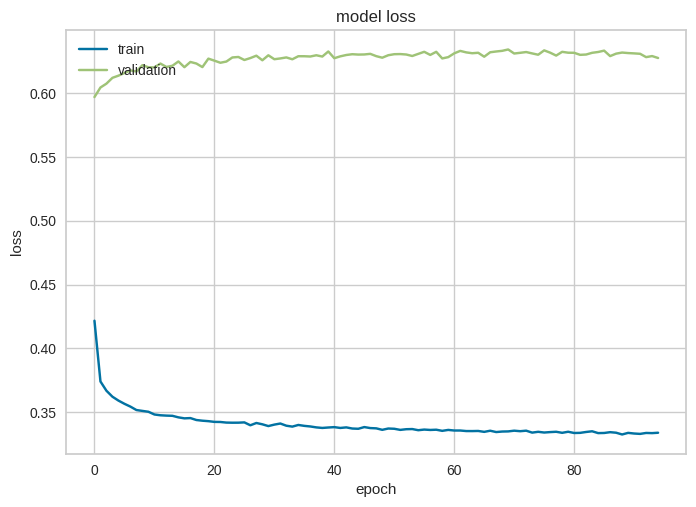

In [743]:
plt.plot(history[0], label='train')
plt.plot(history[1], label='validation')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [744]:
y_pred_proba_nn = nn.predict(X_test)

# Convertir probabilidades a clases (0 o 1)
y_pred_nn = (y_pred_proba_nn > 0.2).astype(int)
print("Classification Report:\n", classification_report(y_test, y_pred_nn))
print("Balanced accuracy: ", round(balanced_accuracy_score(y_test, y_pred_nn),2))

889/889 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.77      0.85     22064
           1       0.51      0.83      0.64      6375

    accuracy                           0.79     28439
   macro avg       0.73      0.80      0.74     28439
weighted avg       0.84      0.79      0.80     28439

Balanced accuracy:  0.8


- Metricas de red neuronal con one hot encoding
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.78      0.85     22064
           1       0.52      0.82      0.63      6375

- Metricas con Optuna
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.78      0.85     22064
           1       0.52      0.81      0.64      6375

In [745]:
# Tiempo final
end_time = time.time()
total_time = end_time - start_time
print(f"\nTiempo total de ejecución del script: {total_time/60:.2f} minutos")


Tiempo total de ejecución del script: 2.06 minutos
